# Sarah's Poisonous Mushroom Data Set

**Author:** Sarah Howard 

**Date:** April 6. 2025

**Objective:** Training a classification model to determine which mushrooms are poisonous or edible.

## Introduction

Using the UCI Mushroom Dataset, I will be training a model to predict if a mushroom is poisonous or edible.

## Imports
In the code cell below, import the necessary Python libraries for this notebook. 

In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

## Section 1. Import and Inspect the Data

### Load the UCI Mushroom dataset and confirm it’s structured correctly

In [134]:
# Load the UCI mushroom dataset from Projects Midterm Data folder
df = pd.read_csv(r"C:\Projects\applied-ml-showard\midterm\Data\agaricus-lepiota.data", delimiter=",", header=None)

# Display info
df.info()

# Display the first 10 rows
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   5       8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-null   object
 11  11      8124 non-null   object
 12  12      8124 non-null   object
 13  13      8124 non-null   object
 14  14      8124 non-null   object
 15  15      8124 non-null   object
 16  16      8124 non-null   object
 17  17      8124 non-null   object
 18  18      8124 non-null   object
 19  19      8124 non-null   object
 20  20      8124 non-null   object
 21  21      8124 non-null   object
 22  22      8124 non-null   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [135]:
# Define the headers as a list
headers = [
    'poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 
    'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
    ]

# Assign the headers to the DataFrame
df.columns = headers
print(df.head())

  poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1             

### Display basic summary statistics

In [136]:
print(df.describe())

       poisonous cap-shape cap-surface cap-color bruises  odor  \
count       8124      8124        8124      8124    8124  8124   
unique         2         6           4        10       2     9   
top            e         x           y         n       f     n   
freq        4208      3656        3244      2284    4748  3528   

       gill-attachment gill-spacing gill-size gill-color stalk-shape  \
count             8124         8124      8124       8124        8124   
unique               2            2         2         12           2   
top                  f            c         b          b           t   
freq              7914         6812      5612       1728        4608   

       stalk-root stalk-surface-above-ring stalk-surface-below-ring  \
count        8124                     8124                     8124   
unique          5                        4                        4   
top             b                        s                        s   
freq         3776       

### Describe the data

In [137]:
print(df.describe())

       poisonous cap-shape cap-surface cap-color bruises  odor  \
count       8124      8124        8124      8124    8124  8124   
unique         2         6           4        10       2     9   
top            e         x           y         n       f     n   
freq        4208      3656        3244      2284    4748  3528   

       gill-attachment gill-spacing gill-size gill-color stalk-shape  \
count             8124         8124      8124       8124        8124   
unique               2            2         2         12           2   
top                  f            c         b          b           t   
freq              7914         6812      5612       1728        4608   

       stalk-root stalk-surface-above-ring stalk-surface-below-ring  \
count        8124                     8124                     8124   
unique          5                        4                        4   
top             b                        s                        s   
freq         3776       

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

Create a scatter matrix

c:\Projects\applied-ml-showard\midterm\.venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Projects\applied-ml-showard\midterm\.venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Projects\applied-ml-showard\midterm\.venv\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


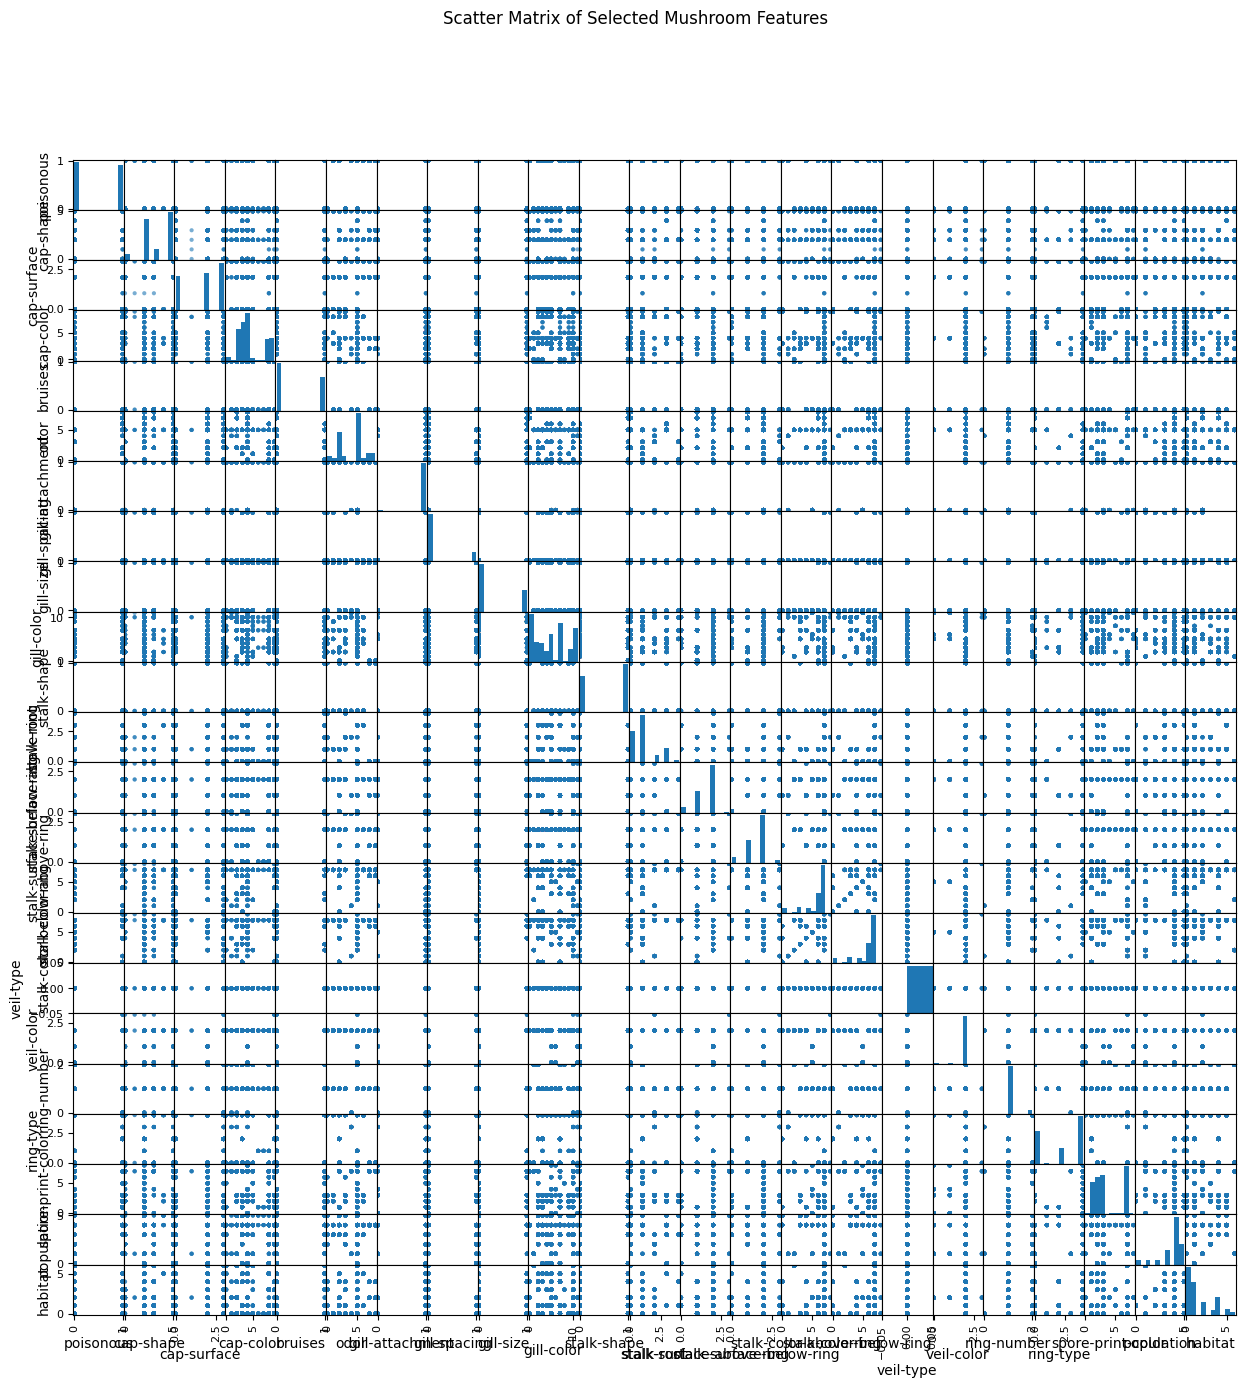

In [138]:
# Use a scatter matrix to visualize feature relationships and distributions:
# List of attributes you want to plot
attributes = ['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 
    'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

# Create a copy of the relevant columns
df_subset = df[attributes].copy()

# Encode all categorical columns to numeric
for col in df_subset.columns:
    le = LabelEncoder()
    df_subset[col] = le.fit_transform(df_subset[col])

# Plot the scatter matrix
scatter_matrix(df_subset, figsize=(15, 15), diagonal='hist', alpha=0.6)
plt.suptitle("Scatter Matrix of Selected Mushroom Features")
plt.show()

Create a bar charts comparing variables to being poisonous

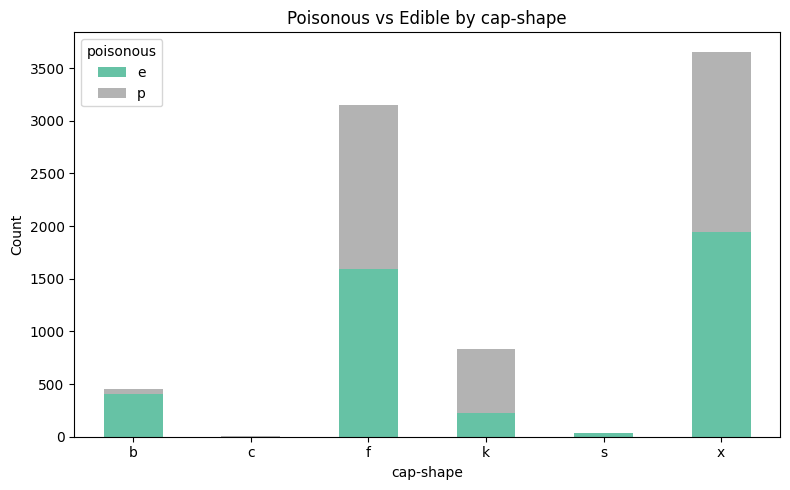

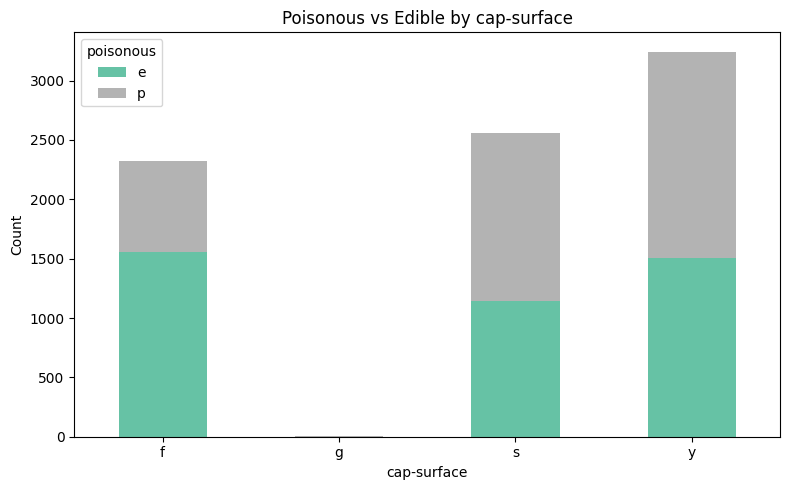

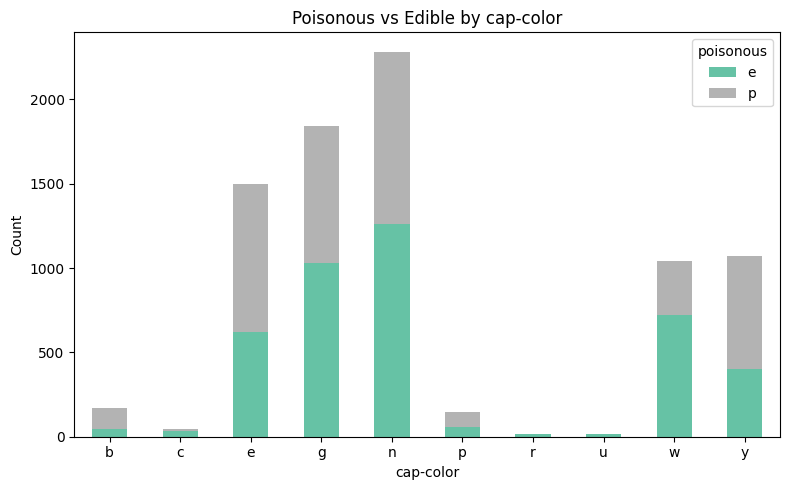

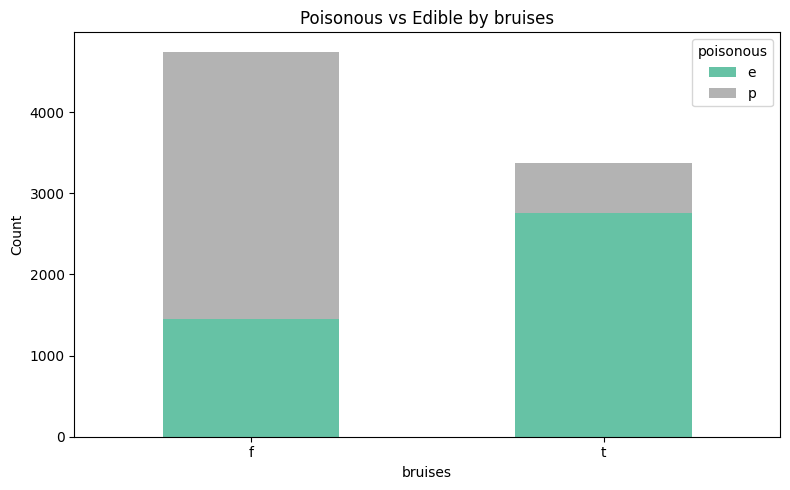

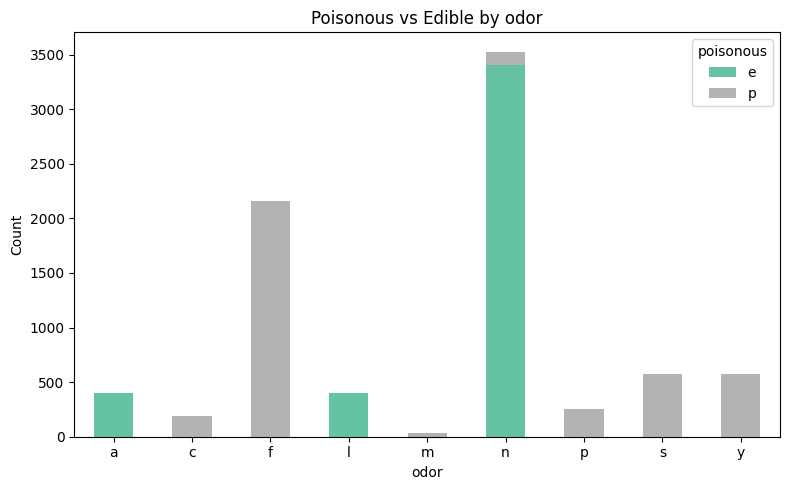

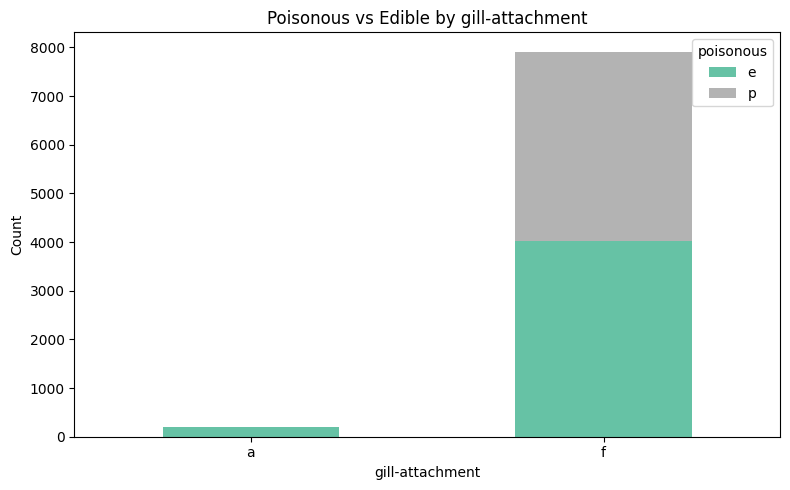

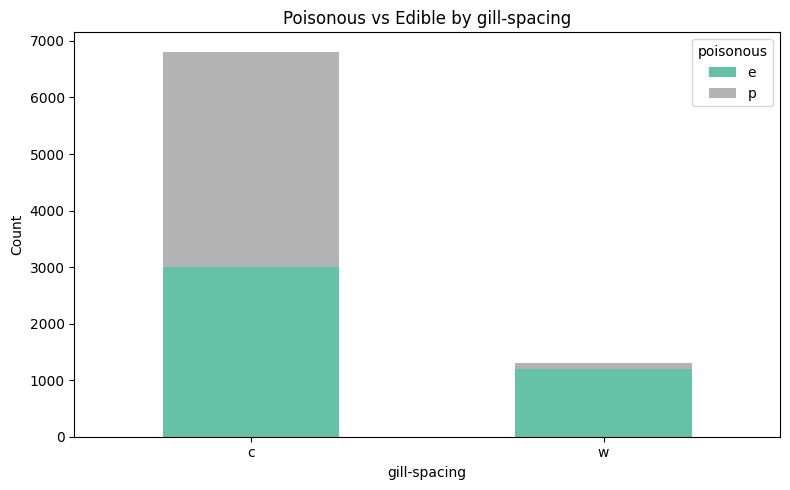

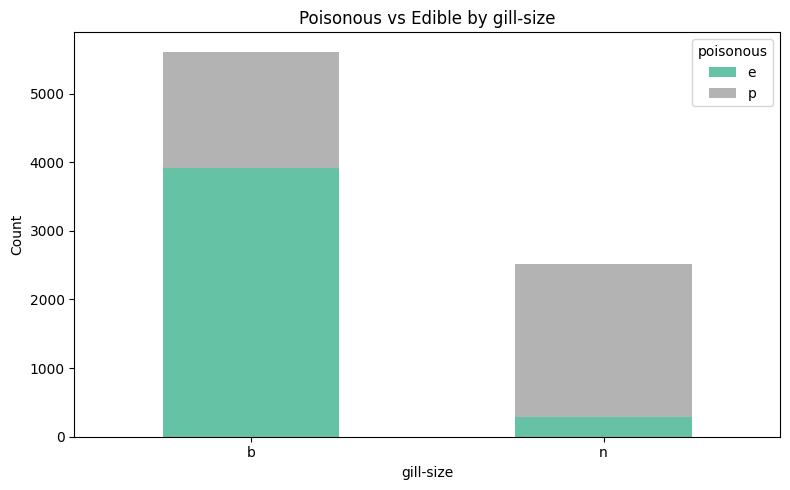

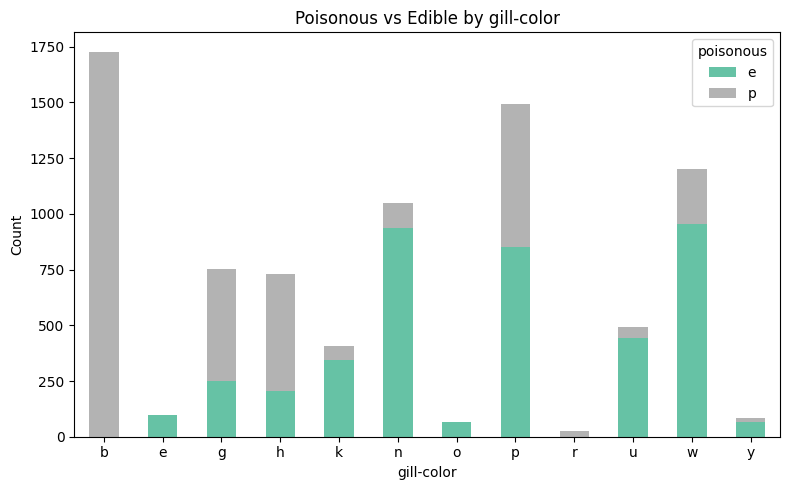

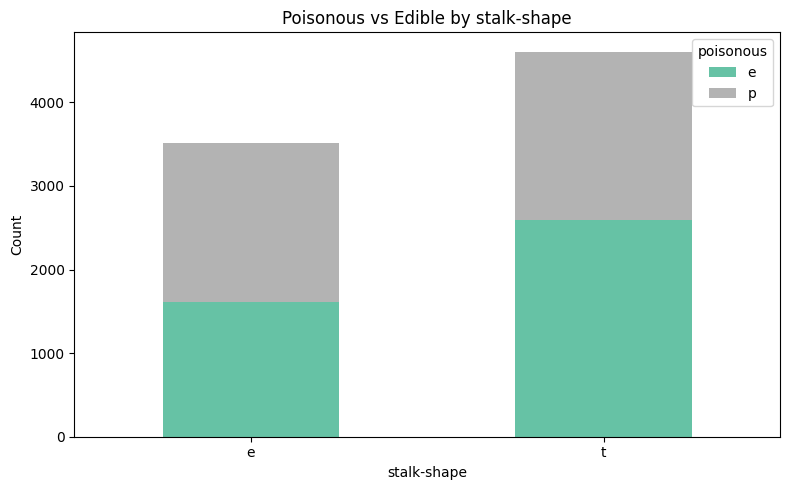

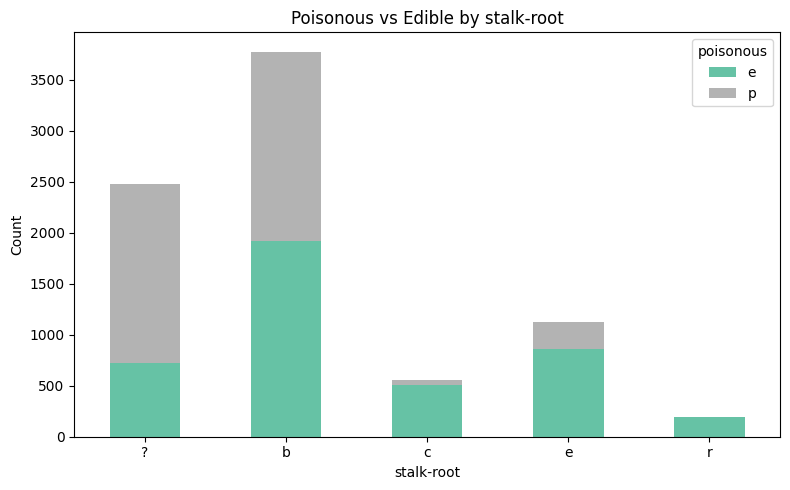

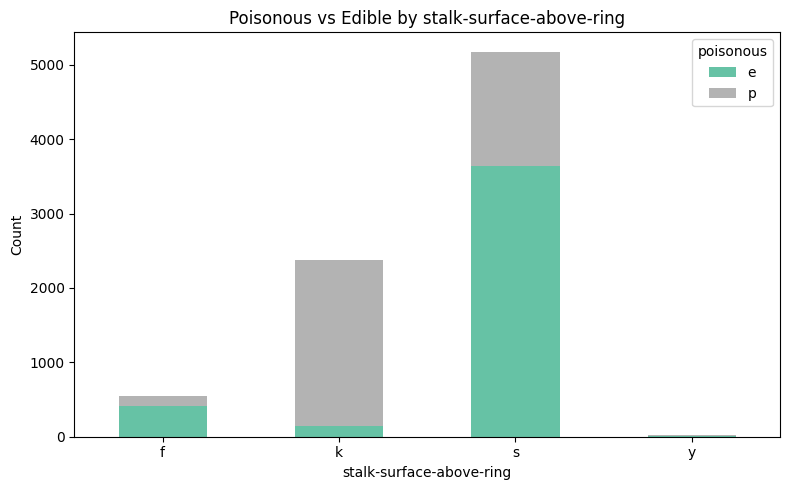

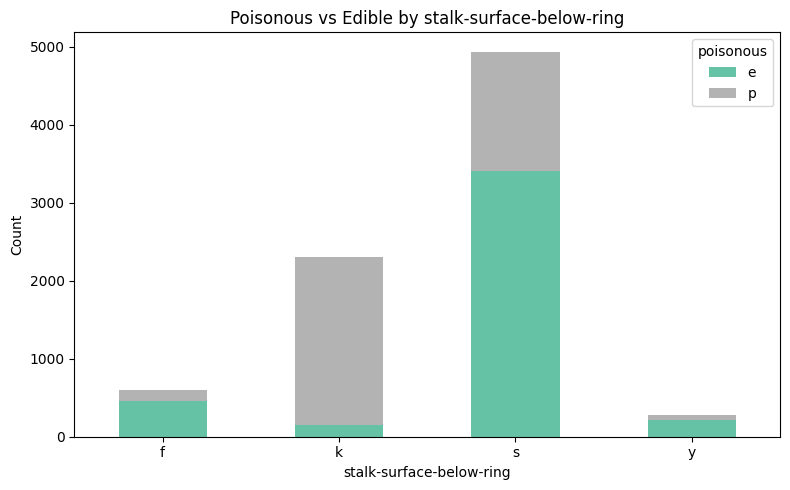

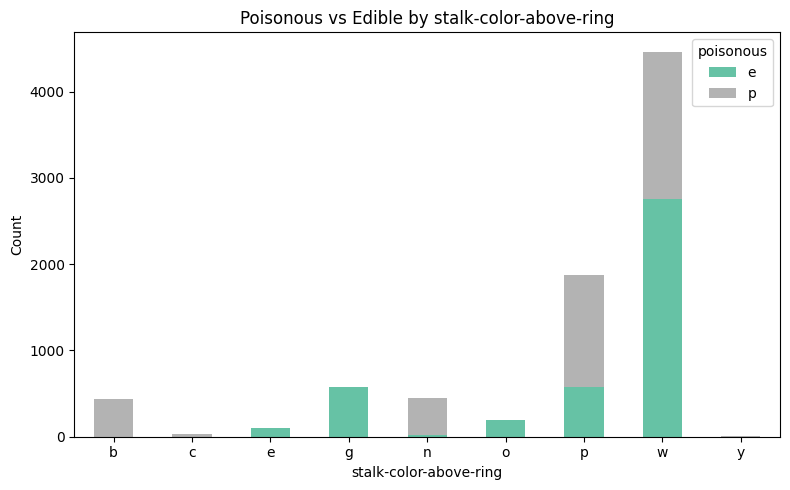

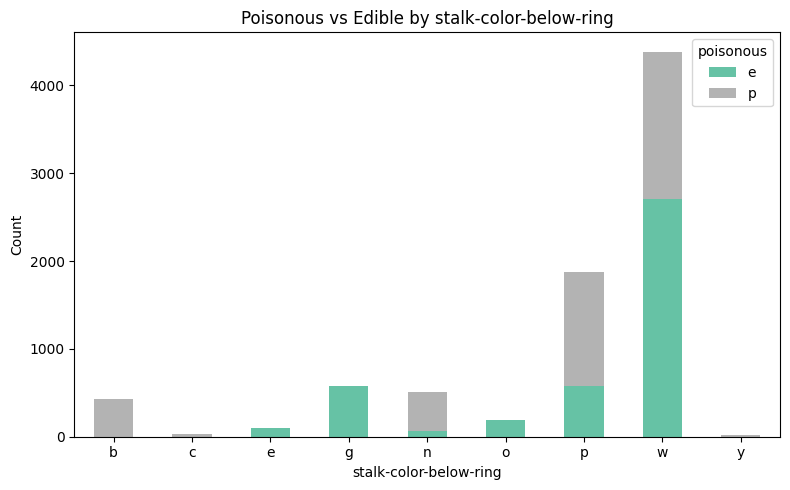

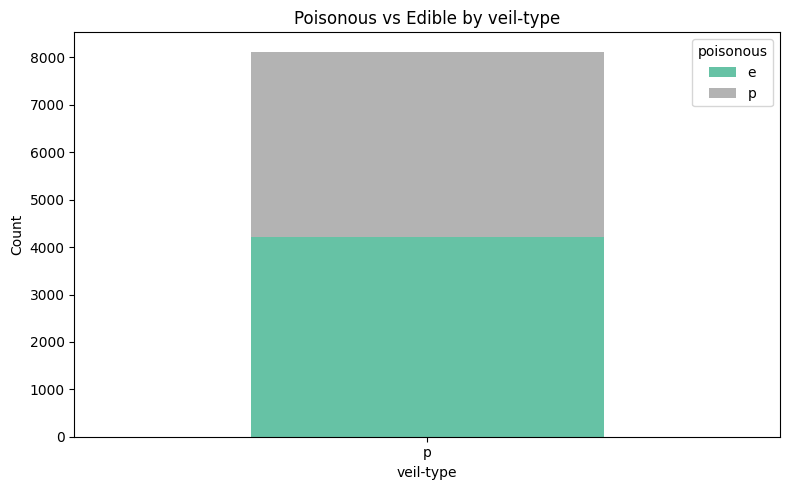

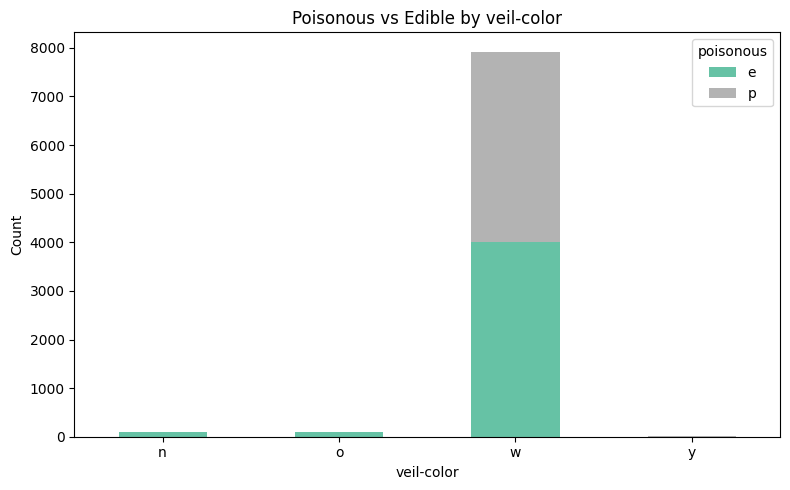

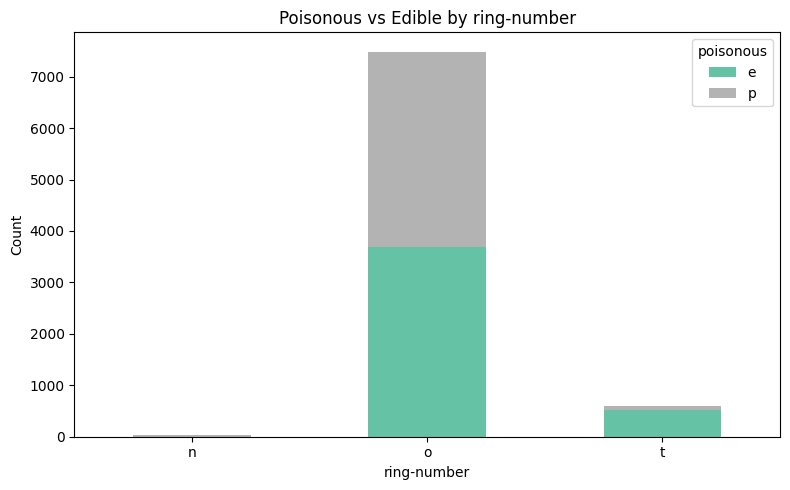

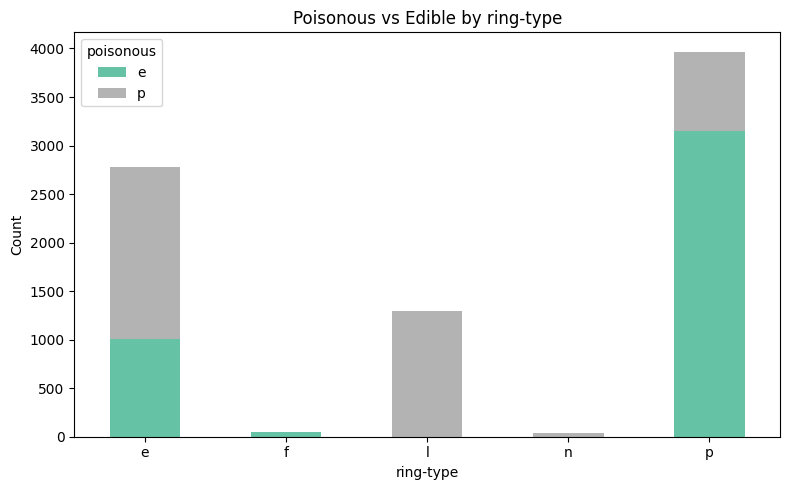

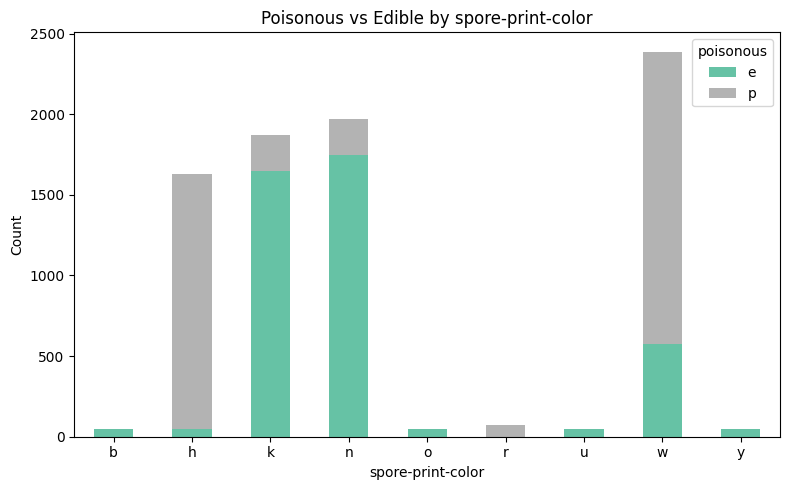

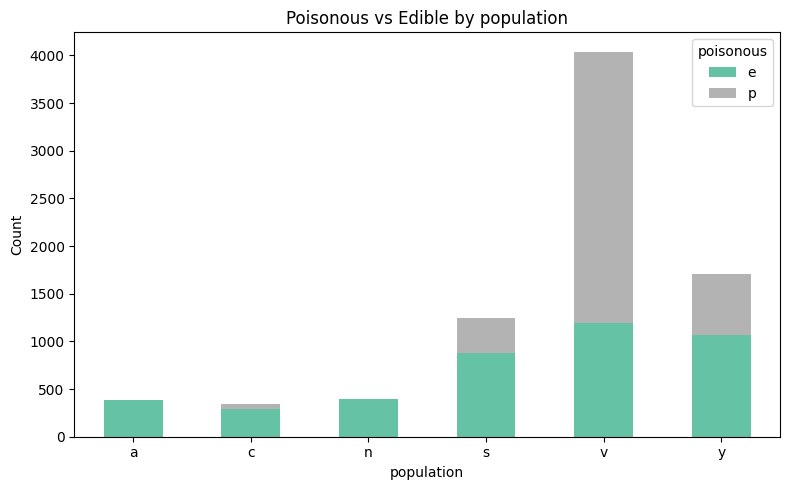

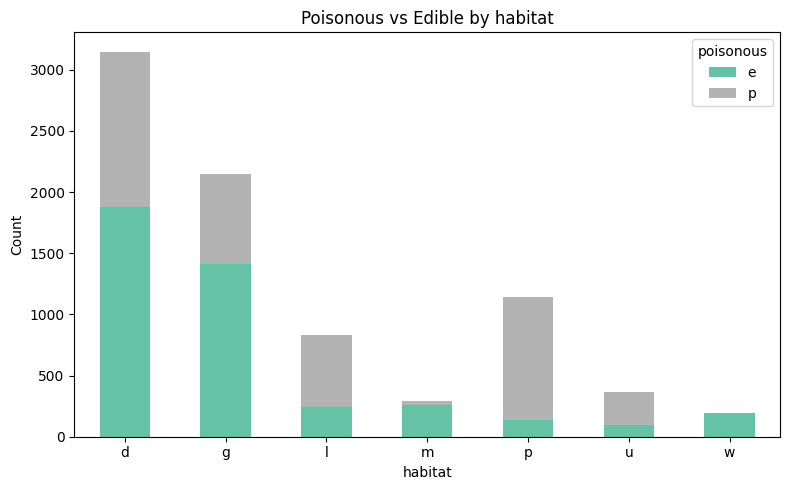

In [139]:
# Get the target column
target_col = 'poisonous'

# Loop through all columns except the target
for feature in df.columns:
    if feature == target_col:
        continue

    # Create a cross-tab of feature vs class
    cross_tab = pd.crosstab(df[feature], df[target_col])

    # Plot stacked bar chart
    cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')
    plt.title(f'Poisonous vs Edible by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title=target_col)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


### 2.2 Cleaning the data

### Encode the dataset from categorical to numerical

In [140]:
# Columns you want to encode
columns = ['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 
    'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

# Dictionary to store LabelEncoders
label_encoders = {}

# Encode each column and store the encoder
for col in columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for later use

In [141]:
# See what each encoded number means

for col in label_encoders:
    classes = label_encoders[col].classes_
    mapping_df = pd.DataFrame({
        'Category': classes,
        'Encoded Value': range(len(classes))
    })
    print(f"\nColumn: {col}")
    print(mapping_df)



Column: poisonous
  Category  Encoded Value
0        e              0
1        p              1

Column: cap-shape
  Category  Encoded Value
0        b              0
1        c              1
2        f              2
3        k              3
4        s              4
5        x              5

Column: cap-surface
  Category  Encoded Value
0        f              0
1        g              1
2        s              2
3        y              3

Column: cap-color
  Category  Encoded Value
0        b              0
1        c              1
2        e              2
3        g              3
4        n              4
5        p              5
6        r              6
7        u              7
8        w              8
9        y              9

Column: bruises
  Category  Encoded Value
0        f              0
1        t              1

Column: odor
  Category  Encoded Value
0        a              0
1        c              1
2        f              2
3        l              3
4      

### 2.3 Feature selection and engineering

In [146]:
# Adding a new variable of "stalk-color" that is a combination of stalk-color-above-ring and stalk-color-below-ring

df["stalk-color"] = df["stalk-color-above-ring"].astype(str) + "_" + df["stalk-color-below-ring"].astype(str)
print(df["stalk-color"])


0       7_7
1       7_7
2       7_7
3       7_7
4       7_7
       ... 
8119    5_5
8120    5_5
8121    5_5
8122    7_7
8123    5_5
Name: stalk-color, Length: 8124, dtype: object


## Section 3. Feature Selection and Justifications

### 3.1 Select Features 

In [ ]:
# Split the data into a training set and a test set
train_set, test_set = train_test_split(df, test_size=0.2, random_state=123)
print(len(train_set), len(test_set))

In [ ]:
reg = LinearRegression()

X = train_set[['cap-shape', 'cap-surface', 'cap-color', 'ring-number']]
y = train_set["poisonous"]

reg.fit(X, y)

In [ ]:
print("The bias is " , reg.intercept_)
print("The feature coefficients are ", reg.coef_)
print("The score for the training set is", reg.score(X,y))

# Check the performance on the test set
X_test = test_set[['cap-shape', 'cap-surface', 'cap-color', 'ring-number']]
y_test = test_set["poisonous"]
print("The score for the test set is", reg.score(X_test,y_test))